## 多层感知机的从零实现

例子: 解决异或问题

In [218]:
import numpy as np
from matplotlib import pyplot as plt

### 训练数据

In [219]:
data = [[[0, 0], [0]],
        [[0, 1], [1]],
        [[1, 0], [1]],
        [[1, 1], [0]]]

X = np.array([x[0] for x in data]).reshape(4,2)
Y = np.array([x[1] for x in data]).reshape(4,1)

### 精确度统计

In [220]:
def accuracy(y_hat, y):
    cnt = 0
    y_hat = [1 if i > 0.5 else 0 for i in y_hat]
    for i in range(len(y)):
        if y[i] == y_hat[i]:
            cnt += 1
    return cnt / len(y)

### 作图函数

In [221]:
def draw(title, xlabel, ylabel, x, y):
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.plot(x, y, 'r')
    plt.show()

### 初始化参数

In [222]:
w1 = np.random.random((2,2))
b1 = np.random.random((1,2))
w2 = np.random.random((2,1))
b2 = np.random.random((1,1))

z1, z2 = 0, 0
a0, a1, a2 = 0, 0, 0

### 激活函数

In [223]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def derivative_sigmoid(x):
    return sigmoid(x) * (1 - sigmoid(x))

### 损失函数

In [224]:
def MSE(y, y_hat):
    return sum((y - y_hat) ** 2) / 2

def derivative_MSE(y, y_hat):
    return y - y_hat

### 网络结构

In [225]:
def mlp_net(x):
    global a0, a1, a2, z1, z2, w1, b1, w2, b2
    a0 = x

    z1 = a0 @ w1 + b1
    a1 = sigmoid(z1)

    z2 = a1 @ w2 + b2
    a2 = sigmoid(z2)

    return a2

### 反向传播更新参数

In [226]:
def update(y_hat, lr):
    global a0, a1, a2, z1, z2, w1, b1, w2, b2
    delta = derivative_MSE(Y, y_hat) * derivative_sigmoid(z2)
    w2_grad = a1.T @ delta
    b2_grad = np.sum(delta, axis=0)

    delta = delta @ w2.T * derivative_sigmoid(z1)
    w1_grad = a0.T @ delta
    b1_grad = np.sum(delta, axis=0)

    w1 += lr * w1_grad
    b1 += lr * b1_grad
    w2 += lr * w2_grad
    b2 += lr * b2_grad

### 训练函数

In [227]:
def train_epoch(net, loss, lr):
    y_hat = net(X)
    l = loss(y_hat, Y)
    acc = accuracy(y_hat, Y)
    update(y_hat, lr)
    
    return l, acc

In [228]:
def train(net, loss, num_epochs, lr):
    loss_list = []
    acc_list = []
    epoch_list = [x+1 for x in range(num_epochs)]

    for epoch in range(num_epochs):
        t_loss, t_acc = train_epoch(net, loss, lr)
        loss_list.append(t_loss)
        acc_list.append(t_acc)

    draw('train_loss', 'epochs', 'loss', epoch_list, loss_list)
    draw('train_acc', 'epochs', 'acc', epoch_list, acc_list)
        
    print(f'最终训练损失: {loss_list[-1]}')
    print(f'最终训练精度: {acc_list[-1]}')

### 开始训练

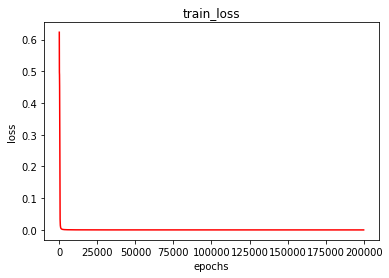

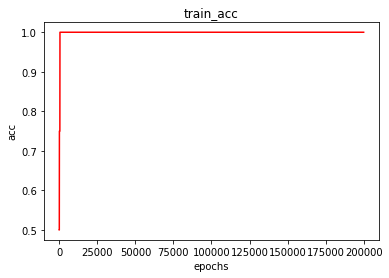

最终训练损失: [1.1931138e-05]
最终训练精度: 1.0


In [229]:
num_epochs = 200000
lr = 1

loss = MSE
net = mlp_net

train(net, loss, num_epochs, lr)